# Pyannote

### Import from develop

In [ ]:
!pip install git+https://github.com/pyannote/pyannote-audio@062bd7bd9a315953b1420500b5061f896c68b4ab

### Import from master

In [ ]:
!pip install pyannote.audio

## Pipeline

![title](https://github.com/pyannote/pyannote-audio/raw/master/pipeline.png)

# dia_ami

## Model

- Model pytorch dia_ami
- Train sur le dataset AMI (70h de meetings annotés)

In [17]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia_ami');

Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master
/Users/loicsaillant/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master


## Test avec Doctolib.wav

Fichier audio issu d'une vidéo avec 3 speakers
- 2 speakers qui parlent la plupart du temps
- 1 speaker qui parle très peu
- musique au début
- FR 🇫🇷

In [19]:
# apply diarization pipeline on your audio file
diarization = pipeline({'audio': 'data/doctolib.wav'})

In [20]:
# dump result to disk using RTTM format
with open('outputs/doctolib_ami.rttm', 'w') as f:
    diarization.write_rttm(f)

In [21]:
# iterate over speech turns
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f'Speaker "{speaker}" speaks between t={turn.start:.1f}s and t={turn.end:.1f}s.')

Speaker "A" speaks between t=0.4s and t=0.9s.
Speaker "22" speaks between t=0.9s and t=1.6s.
Speaker "A" speaks between t=1.6s and t=12.4s.
Speaker "B" speaks between t=12.4s and t=14.0s.
Speaker "A" speaks between t=14.0s and t=38.4s.
Speaker "B" speaks between t=38.4s and t=53.5s.
Speaker "A" speaks between t=53.5s and t=55.8s.
Speaker "B" speaks between t=55.8s and t=97.2s.
Speaker "A" speaks between t=97.2s and t=148.2s.
Speaker "B" speaks between t=148.2s and t=162.3s.
Speaker "A" speaks between t=162.3s and t=163.3s.
Speaker "B" speaks between t=163.3s and t=168.3s.
Speaker "A" speaks between t=168.3s and t=169.0s.
Speaker "B" speaks between t=169.0s and t=208.8s.


### Remarques

- Diarization précise
- La musique au début est détéctée comme de la SAD 🤔
- Speaker 22 🤷🏻‍♂️

## Test avec martin.wav

- Interview tele 
- 2 personnes
- EN 🇺🇸

In [22]:
# apply diarization pipeline on your audio file
diarization_martin = pipeline({'audio': 'data/martin.wav'})

In [23]:
# dump result to disk using RTTM format
with open('outputs/martin_ami.rttm', 'w') as f:
    diarization_martin.write_rttm(f)

In [24]:
# iterate over speech turns
for turn, _, speaker in diarization_martin.itertracks(yield_label=True):
    print(f'Speaker "{speaker}" speaks between t={turn.start:.1f}s and t={turn.end:.1f}s.')

Speaker "A" speaks between t=0.0s and t=5.8s.
Speaker "9" speaks between t=5.8s and t=6.5s.
Speaker "A" speaks between t=6.5s and t=16.9s.
Speaker "A" speaks between t=18.3s and t=22.5s.
Speaker "13" speaks between t=22.5s and t=23.2s.
Speaker "A" speaks between t=23.2s and t=110.4s.


# dia

## Model

- Model pytorch dia
- Train sur VoxCeleb1.custom.trn ⋃ VoxCeleb2.trn ⋃ DIHARD.custom.tr

In [25]:
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia');

Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master
/Users/loicsaillant/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)
/Users/loicsaillant/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/features/pretrained.py:156: UserWarning: Model was trained with 4s chunks and is applied on 2s chunks. This might lead to sub-optimal results.
  warnings.warn(msg)
Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master


## doctolib.wav

In [29]:
# apply diarization pipeline on your audio file
diarization = pipeline({'audio': 'data/doctolib.wav'})

In [30]:
# dump result to disk using RTTM format
with open('outputs/doctolib.rttm', 'w') as f:
    diarization.write_rttm(f)

In [31]:
# iterate over speech turns
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f'Speaker "{speaker}" speaks between t={turn.start:.1f}s and t={turn.end:.1f}s.')

Speaker "A" speaks between t=0.6s and t=0.8s.
Speaker "B" speaks between t=1.0s and t=2.3s.
Speaker "A" speaks between t=2.3s and t=4.3s.
Speaker "A" speaks between t=4.8s and t=5.3s.
Speaker "A" speaks between t=5.6s and t=5.8s.
Speaker "A" speaks between t=6.1s and t=9.8s.
Speaker "A" speaks between t=10.2s and t=11.6s.
Speaker "A" speaks between t=11.9s and t=15.5s.
Speaker "A" speaks between t=15.9s and t=18.8s.
Speaker "A" speaks between t=19.5s and t=20.4s.
Speaker "A" speaks between t=20.8s and t=24.6s.
Speaker "A" speaks between t=24.8s and t=25.1s.
Speaker "A" speaks between t=25.3s and t=31.0s.
Speaker "A" speaks between t=31.4s and t=34.8s.
Speaker "B" speaks between t=35.0s and t=39.2s.
Speaker "B" speaks between t=39.6s and t=46.4s.
Speaker "B" speaks between t=46.9s and t=49.4s.
Speaker "B" speaks between t=49.6s and t=52.7s.
Speaker "A" speaks between t=52.7s and t=54.3s.
Speaker "A" speaks between t=54.6s and t=55.1s.
Speaker "B" speaks between t=55.1s and t=56.7s.
Spea

## martin.wav

In [32]:
# apply diarization pipeline on your audio file
diarization = pipeline({'audio': 'data/martin.wav'})

In [33]:
# dump result to disk using RTTM format
with open('outputs/martin.rttm', 'w') as f:
    diarization.write_rttm(f)

In [34]:
# iterate over speech turns
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f'Speaker "{speaker}" speaks between t={turn.start:.1f}s and t={turn.end:.1f}s.')

Speaker "B" speaks between t=0.0s and t=1.1s.
Speaker "B" speaks between t=1.8s and t=4.3s.
Speaker "B" speaks between t=4.5s and t=7.1s.
Speaker "B" speaks between t=7.8s and t=9.1s.
Speaker "B" speaks between t=9.4s and t=11.0s.
Speaker "B" speaks between t=11.2s and t=12.9s.
Speaker "B" speaks between t=13.4s and t=14.6s.
Speaker "B" speaks between t=15.2s and t=15.6s.
Speaker "B" speaks between t=16.1s and t=16.5s.
Speaker "B" speaks between t=18.4s and t=19.5s.
Speaker "B" speaks between t=20.0s and t=23.7s.
Speaker "A" speaks between t=24.4s and t=26.6s.
Speaker "A" speaks between t=27.4s and t=31.4s.
Speaker "B" speaks between t=31.9s and t=34.3s.
Speaker "B" speaks between t=34.5s and t=36.7s.
Speaker "B" speaks between t=37.7s and t=38.6s.
Speaker "A" speaks between t=38.6s and t=42.4s.
Speaker "A" speaks between t=42.8s and t=45.0s.
Speaker "A" speaks between t=46.1s and t=51.0s.
Speaker "A" speaks between t=51.9s and t=54.9s.
Speaker "A" speaks between t=55.6s and t=56.5s.
S

### Representation

In [38]:
from pyannote.database.util import load_rttm

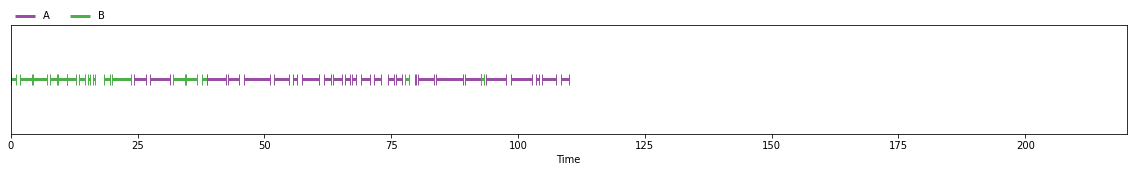

In [77]:
pred = load_rttm('outputs/martin.rttm')
pred['<NA>']

## martin2.wav

In [35]:
# apply diarization pipeline on your audio file
diarization = pipeline({'audio': 'data/martin2.wav'})

In [36]:
# dump result to disk using RTTM format
with open('outputs/martin2.rttm', 'w') as f:
    diarization.write_rttm(f)

In [37]:
# iterate over speech turns
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f'Speaker "{speaker}" speaks between t={turn.start:.1f}s and t={turn.end:.1f}s.')

Speaker "B" speaks between t=0.4s and t=3.1s.
Speaker "B" speaks between t=3.4s and t=5.5s.
Speaker "B" speaks between t=5.9s and t=11.6s.
Speaker "A" speaks between t=11.9s and t=13.7s.
Speaker "A" speaks between t=14.0s and t=17.6s.
Speaker "B" speaks between t=18.0s and t=21.0s.
Speaker "A" speaks between t=21.0s and t=25.4s.
Speaker "A" speaks between t=25.7s and t=31.2s.
Speaker "B" speaks between t=31.4s and t=34.3s.
Speaker "B" speaks between t=34.8s and t=37.4s.
Speaker "A" speaks between t=37.4s and t=41.3s.
Speaker "A" speaks between t=41.6s and t=44.4s.
Speaker "B" speaks between t=44.7s and t=46.7s.
Speaker "B" speaks between t=47.2s and t=48.3s.
Speaker "B" speaks between t=48.9s and t=52.4s.
Speaker "A" speaks between t=52.4s and t=56.1s.
Speaker "B" speaks between t=56.5s and t=57.7s.
Speaker "A" speaks between t=58.0s and t=61.7s.
Speaker "B" speaks between t=62.1s and t=64.8s.
Speaker "B" speaks between t=65.3s and t=67.4s.
Speaker "A" speaks between t=67.7s and t=69.6

In [65]:
from pyannote.core import Segment, notebook
# make notebook visualization zoom on 600s < t < 660s time range
EXCERPT = Segment(0, 220)
notebook.crop = EXCERPT

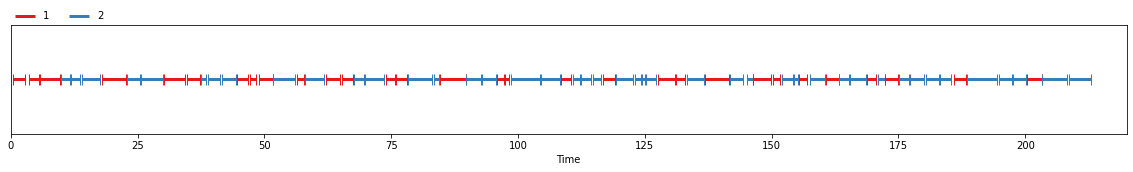

In [70]:
groundtruth = load_rttm('outputs/groundtruth/martin2_gt.rttm')
groundtruth = groundtruth['121-127105']
groundtruth

In [75]:
from pyannote.metrics.diarization import DiarizationErrorRate
pred = load_rttm('outputs/martin2.rttm')['<NA>']

metric = DiarizationErrorRate()
der = metric(groundtruth, pred,detailed=True)
der

{'false alarm': 3.3459999999999868,
 'confusion': 7.154999999999987,
 'correct': 178.07800000000003,
 'total': 192.75000000000003,
 'missed detection': 7.516999999999999,
 'diarization error rate': 0.09347859922178972}

## Speaker activity detection

In [13]:
pipeline_sad = torch.hub.load('pyannote/pyannote-audio', 'sad', pipeline=True)

# apply speech activity detection pipeline on your audio file
speech_activity_detection = pipeline({'audio': 'data/doctolib.wav'})

# dump result to disk using RTTM format
# with open('/path/to/your/audio.sad.rttm', 'w') as f:
#     speech_activity_detection.write_rttm(f)

for speech_region in speech_activity_detection.get_timeline():
    print(f'There is speech between t={speech_region.start:.1f}s and t={speech_region.end:.1f}s.')

Using cache found in /Users/loicsaillant/.cache/torch/hub/pyannote_pyannote-audio_master


There is speech between t=0.6s and t=0.8s.
There is speech between t=1.0s and t=2.3s.
There is speech between t=2.3s and t=4.3s.
There is speech between t=4.8s and t=5.3s.
There is speech between t=5.6s and t=5.8s.
There is speech between t=6.1s and t=9.8s.
There is speech between t=10.2s and t=11.6s.
There is speech between t=11.9s and t=15.5s.
There is speech between t=15.9s and t=18.8s.
There is speech between t=19.5s and t=20.4s.
There is speech between t=20.8s and t=24.6s.
There is speech between t=24.8s and t=25.1s.
There is speech between t=25.3s and t=31.0s.
There is speech between t=31.4s and t=34.8s.
There is speech between t=35.0s and t=39.2s.
There is speech between t=39.6s and t=46.4s.
There is speech between t=46.9s and t=49.4s.
There is speech between t=49.6s and t=52.7s.
There is speech between t=52.7s and t=54.3s.
There is speech between t=54.6s and t=55.1s.
There is speech between t=55.1s and t=56.7s.
There is speech between t=56.8s and t=59.0s.
There is speech betwee